In [4]:
import sys
import numpy as np
from numpy import linalg

print(f'Python:{sys.version}')
print(f'Numpy:{np.__version__}')

Python:3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy:1.14.3


In [6]:
# define an array
A = np.arange(9) - 3
A

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [7]:
B = A.reshape((3, 3))
B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [8]:
# Eucidian (L2) nor -- default
print(np.linalg.norm(A))
print(np.linalg.norm(B))

8.306623862918075
8.306623862918075


In [11]:
# the frogenius norm is the L2 norm for a matrix
print(np.linalg.norm(B, 'fro'))

8.306623862918075


In [13]:
# the max norm (p = infinity)
print(np.linalg.norm(A, np.inf))
print(np.linalg.norm(B, np.inf))

5.0
12.0


In [14]:
# vector normalization - normalization to produce a unit vector
norm = np.linalg.norm(A)
A_unit = A / norm
A_unit

array([-0.36115756, -0.24077171, -0.12038585,  0.        ,  0.12038585,
        0.24077171,  0.36115756,  0.48154341,  0.60192927])

In [15]:
# the magnitud to a unit vector is equal to 1
np.linalg.norm(A_unit)

0.9999999999999999

Eigendecomposition of a matrix

In linear algebra, eigendecomposition or sometimes spectral decomposition is the factorization of a matrix into a canonical form, whereby the matrix is represented in terms of its eigenvalues and eigenvectors

In [17]:
# find the eigenvalues an deigenvectors for a simple square matrix
A = np.diag(np.arange(1, 4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [23]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [24]:
# return teh eigenvalues for the matriz
eigenvalues

array([1., 2., 3.])

In [22]:
# return the eigenvectors for the matriz
eigenvectors

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [25]:
# the eigenvalue w[i] corresponds to the eigenvectors v[i, i]
print(f'Eigenvaues: {eigenvalues[2]}')
print(f'Eigenvectors: {eigenvectors[2]}')

Eigenvaues: 3.0
Eigenvectors: [0. 0. 1.]


In [29]:
#verify eigencomposition
matrix =  np.matmul(np.diag(eigenvalues), np.linalg.inv(eigenvectors))
output = np.matmul(eigenvectors, matrix).astype(np.int)
output

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [33]:
# import necessary matplotlib libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

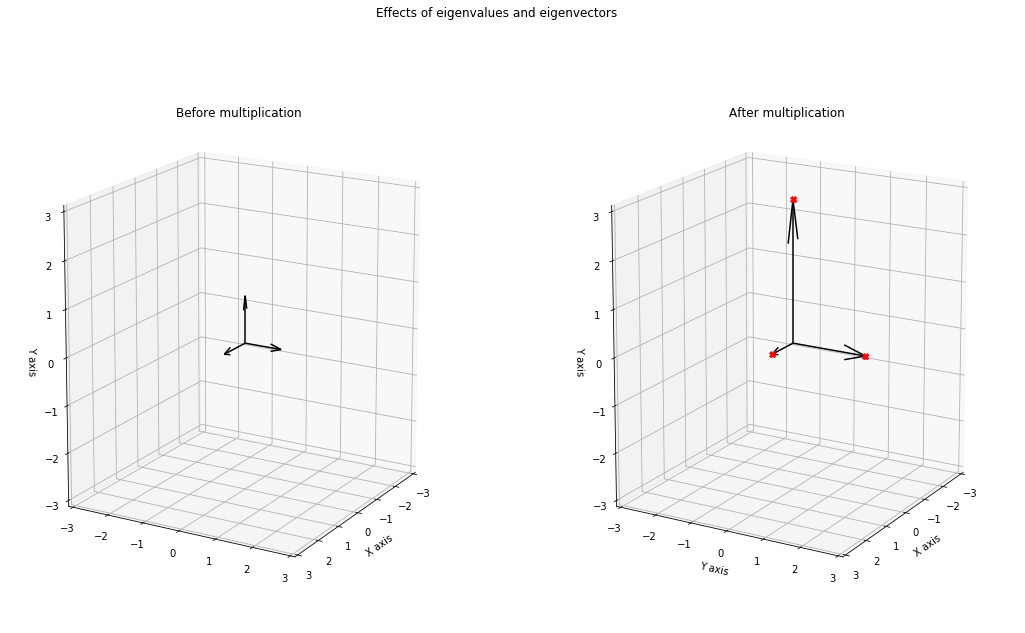

In [37]:
# plot the igenvectors
origin = [0, 0, 0]

fig = plt.figure(figsize=(18, 10))
fig.suptitle('Effects of eigenvalues and eigenvectors')
ax1 = fig.add_subplot(121, projection = '3d')

ax1.quiver(origin, origin, origin, eigenvectors[0, :], eigenvectors[1, :], eigenvectors[2, :], color = 'k' )
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_zlim([-3, 3])
ax1.set_xlabel('X axis')
axl.set_ylabel('Y axis')
ax1.set_zlabel('Y axis')
ax1.view_init(15, 30)
ax1.set_title('Before multiplication')

# multiply original matrix for eigenvectors
new_eig = np.matmul(A, eigenvectors)
ax2 = plt.subplot(122, projection = '3d')
ax2.quiver(origin, origin, origin, new_eig[0, :], new_eig[1, :], new_eig[2, :], color = 'k' )

# add the eigenvalues to the plot
ax2.plot((eigenvalues[0] * eigenvectors[0]), (eigenvalues[1] * eigenvectors[1]), (eigenvalues[2] * eigenvectors[2]), 'rX')
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_zlim([-3, 3])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Y axis')
ax2.view_init(15, 30)
ax2.set_title('After multiplication')

plt.show()